In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine


In [2]:
database_path = "../CSV Files/salaries.csv"
engine = create_engine('postgresql://localhost:5432/employee_db_updated')
connection = engine.connect()

ModuleNotFoundError: No module named 'psycopg2'

In [43]:
salary_csv = "../CSV Files/salaries.csv"
employee_csv = "../CSV Files/employees.csv"
title_csv = "../CSV Files/titles.csv"

In [44]:
salaries_df = pd.read_csv(salary_csv, encoding="utf-8")
employee_df = pd.read_csv(employee_csv, encoding="utf-8")
title_df = pd.read_csv(title_csv, encoding="utf-8")



In [48]:
salaries_df.head()

,employee_id,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
salaries_df["salary"].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

In [16]:
bins = [0, 39999.9, 49999.9, 59999.9, 69999.9, 79999.9, 89999.9, 99999.9, 109999.9,119999.9, 129999.9]
salary_groups = ["less than 40K", "40-50K", "50-60K", "60-70K", "70-80K", "80-90K", "90-100K", "100-110K", "110-120","120-130K"]

In [17]:
salaries_df["Grouped_Salaries"] = pd.cut(salaries_df["salary"], bins, labels=salary_groups, include_lowest=True)
grouped_salaries_df = salaries_df.groupby("Grouped_Salaries").count()
grouped_salaries_df

,employee_id,salary
Grouped_Salaries,,
less than 40K,0,0
40-50K,158465,158465
50-60K,57915,57915
60-70K,41413,41413
70-80K,24814,24814
80-90K,11845,11845
90-100K,4284,4284
100-110K,1069,1069
110-120,195,195


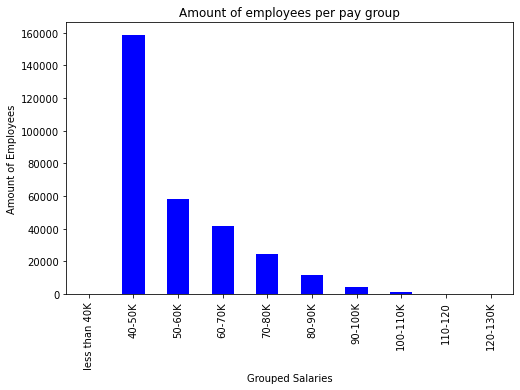

In [39]:
out = salaries_df["Grouped_Salaries"]
ax = out.value_counts(sort=False).plot.bar(color="b", figsize=(8,5))
ax.set_xlabel("Grouped Salaries")
ax.set_ylabel("Amount of Employees")
ax.set_title("Amount of employees per pay group")
plt.xticks(rotation=90)
plt.show()

In [51]:
merge_employee_salary = pd.merge(employee_df, salaries_df, on= "employee_id")
merge_employee_salary_title = pd.merge(merge_employee_salary, title_df, on = "title_id")
merge_employee_salary_title.head()

,employee_id,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/53,Hideyuki,Zallocco,M,4/28/90,40000,Staff
1,421786,s0001,9/28/57,Xiong,Verhoeff,M,11/26/87,40000,Staff
2,273487,s0001,4/14/57,Christoph,Parfitt,M,6/28/91,56087,Staff
3,246449,s0001,3/23/58,Subbu,Bultermann,F,3/25/88,87084,Staff
4,48085,s0001,1/19/64,Venkatesan,Gilg,M,6/28/93,63016,Staff


In [75]:
grouped_title = merge_employee_salary_title.groupby(['title'])
avg_title_salary = grouped_title["salary"].mean()
avg_title_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

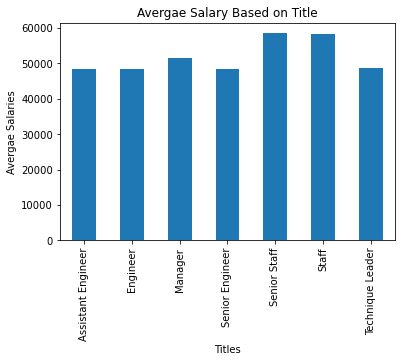

In [82]:
grouped_title = merge_employee_salary_title.groupby(['title'])
avg_title_salary = grouped_title["salary"].mean()

salary_chart = avg_title_salary.plot(kind='bar')
salary_chart.set_xlabel("Titles")
salary_chart.set_ylabel("Avergae Salaries")
salary_chart.set_title("Avergae Salary Based on Title")
# plt.savefig("output_data/crash_type_occurance.png", bbox_inches = 'tight', pad_inches=0.5)
plt.show()